
# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dicom_data = pd.read_csv('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/csv/dicom_info.csv')

In [ ]:
dicom_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [ ]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [ ]:
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [ ]:
image_dir = '/content/drive/MyDrive/CBIS-DDSM Breast Cancer/jpeg'

In [ ]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

0     /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
3     /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
6     /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
7     /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
10    /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
Name: image_path, dtype: object

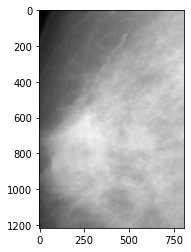

In [ ]:
for file  in cropped_images[0:5]:
  cropped_images_show = PIL.Image.open(file)
  gray_img= cropped_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [ ]:
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [ ]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.head()

1     /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
2     /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
11    /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
12    /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
15    /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
Name: image_path, dtype: object

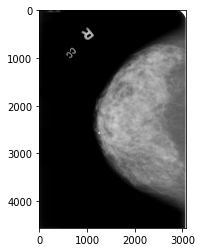

In [ ]:
for file  in full_mammogram_images[0:5]:
  full_mammogram_images_show = PIL.Image.open(file)
  gray_img= full_mammogram_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [ ]:
ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [ ]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
8     /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
9     /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
14    /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
20    /content/drive/MyDrive/CBIS-DDSM Breast Cancer...
Name: image_path, dtype: object

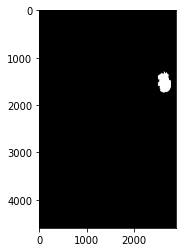

In [ ]:
for file  in ROI_mask_images[0:5]:
  ROI_mask_images_show = PIL.Image.open(file)
  gray_img= ROI_mask_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [ ]:
data_1=pd.read_csv('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/csv/calc_case_description_train_set.csv')

In [ ]:
data_1.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [ ]:
data_1.describe()

breast density  abnormality id   assessment     subtlety
count     1546.000000     1546.000000  1546.000000  1546.000000
mean         2.663648        1.415265     3.258732     3.411384
std          0.937219        0.903571     1.229231     1.179754
min          1.000000        1.000000     0.000000     1.000000
25%          2.000000        1.000000     2.000000     3.000000
50%          3.000000        1.000000     4.000000     3.000000
75%          3.000000        1.000000     4.000000     4.000000
max          4.000000        7.000000     5.000000     5.000000

In [ ]:
data_2=pd.read_csv('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/csv/mass_case_description_train_set.csv')

In [ ]:
data_2.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [ ]:
data_2.describe()

breast_density  abnormality id   assessment     subtlety
count     1318.000000     1318.000000  1318.000000  1318.000000
mean         2.203338        1.116085     3.504552     3.965857
std          0.873774        0.467013     1.414609     1.102032
min          1.000000        1.000000     0.000000     0.000000
25%          2.000000        1.000000     3.000000     3.000000
50%          2.000000        1.000000     4.000000     4.000000
75%          3.000000        1.000000     4.000000     5.000000
max          4.000000        6.000000     5.000000     5.000000

# Data cleaning

In [ ]:
dicom_cleaning_data = dicom_data.copy()
dicom_cleaning_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [ ]:
dicom_cleaning_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)

In [ ]:
dicom_cleaning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [ ]:
dicom_cleaning_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [ ]:
dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
dicom_cleaning_data.isna().sum()

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [ ]:
Data_cleaning_1 = data_1.copy()

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})

In [ ]:
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')

In [ ]:
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')

In [ ]:
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')

In [ ]:
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')

In [ ]:
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')

In [ ]:
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')

In [ ]:
Data_cleaning_1.isna().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [ ]:
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
Data_cleaning_1.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [ ]:
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1546 non-null   object  
 1   breast_density           1546 non-null   int64   
 2   left_or_right_breast     1546 non-null   category
 3   image_view               1546 non-null   category
 4   abnormality id           1546 non-null   int64   
 5   abnormality_type         1546 non-null   category
 6   calc_type                1546 non-null   category
 7   calc_distribution        1546 non-null   category
 8   assessment               1546 non-null   int64   
 9   pathology                1546 non-null   category
 10  subtlety                 1546 non-null   int64   
 11  image file path          1546 non-null   object  
 12  cropped image file path  1546 non-null   object  
 13  ROI mask file path       1546 non-null   object  
dtypes: categ

In [ ]:
Data_cleaning_2 = data_2.copy()

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})

In [ ]:
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')

In [ ]:
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')

In [ ]:
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')

In [ ]:
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')

In [ ]:
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')

In [ ]:
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

In [ ]:
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [ ]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
Data_cleaning_2.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [ ]:
Data_cleaning_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1318 non-null   object  
 1   breast_density           1318 non-null   int64   
 2   left_or_right_breast     1318 non-null   category
 3   image_view               1318 non-null   category
 4   abnormality id           1318 non-null   int64   
 5   abnormality_type         1318 non-null   category
 6   mass_shape               1318 non-null   category
 7   mass_margins             1318 non-null   category
 8   assessment               1318 non-null   int64   
 9   pathology                1318 non-null   category
 10  subtlety                 1318 non-null   int64   
 11  image file path          1318 non-null   object  
 12  cropped image file path  1318 non-null   object  
 13  ROI mask file path       1318 non-null   object  
dtypes: categ

# Data Visualization

In [ ]:
breast_img = glob.glob('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/jpeg/**/*.jpg', recursive = True)

In [ ]:
len(breast_img)

10237

In [ ]:
for imgname in breast_img[:3]:
    print(imgname)

/content/drive/MyDrive/CBIS-DDSM Breast Cancer/jpeg/1.3.6.1.4.1.9590.100.1.2.42762912711049730303427014573334305742/1-054.jpg
/content/drive/MyDrive/CBIS-DDSM Breast Cancer/jpeg/1.3.6.1.4.1.9590.100.1.2.427723824512152682811037385363205255031/1-133.jpg
/content/drive/MyDrive/CBIS-DDSM Breast Cancer/jpeg/1.3.6.1.4.1.9590.100.1.2.427732696412560523721343771383026458297/1-201.jpg


In [ ]:
breast_img[0].split('/')[-1][0]

'1'

In [ ]:
non_can_img = []
can_img = []

for img in breast_img:
    if img.split('/')[-1][0] == '2' :
        non_can_img.append(img)
        # print(img)

    elif img.split('/')[-1][0] == '1' :
        can_img.append(img)

In [ ]:
non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)   # Cancer

total_img_num = non_can_num + can_num

print('Number of Images of no cancer: {}' .format(non_can_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(can_num))   # images of cancer
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 3463
Number of Images of cancer : 6774
Total Number of Images : 10237


In [ ]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [3463,6774]})

In [ ]:
bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of Patients', color='state of cancer')
bar.update_layout(title_text='Number of Patients with cancer (1) and patients with no cancer (0)', title_x=0.5)
bar.show()

from breast-histopathology-images Dataset , we coclude that from the above chart that : **Cases with No cancer (0) is more than Cases with cancer(1)**                                                          

In [ ]:
r= pd.DataFrame(dicom_cleaning_data['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

SeriesDescription  SeriesDescription_counts
0         cropped images                      3859
1        ROI mask images                      3340
2  full mammogram images                      3038

In [ ]:
ba_1 = px.bar(data_frame=r, x = 'SeriesDescription', y='SeriesDescription_counts', color='SeriesDescription')
ba_1.update_layout(title_text='Types of images used', title_x=0.5)
ba_1.show()

from cbis-ddsm-breast-cancer-image-dataset : This study depends on Three types of images ; cropped images , ROI images , Full mammogram images . **from this graph we conclude that cropped images is the most used between them**

In [ ]:
q= pd.DataFrame(dicom_cleaning_data['PatientOrientation'].value_counts())
q= q.reset_index()
q= q.rename(columns={'PatientOrientation':'PatientOrientation_counts', 'index':'PatientOrientation'})
q

PatientOrientation  PatientOrientation_counts
0                MLO                       5434
1                 CC                       4803

In [ ]:
qfig =px.pie(data_frame=q, names= 'PatientOrientation', values='PatientOrientation_counts', color = 'PatientOrientation')
qfig.update_layout(title_text='The percenyages of PatientOrientation ', title_x=0.5)
qfig.show()

from cbis-ddsm-breast-cancer-image-dataset in general : **PatientOrientation (image_view) from the above graph MLO is much used than CC**

In [ ]:
f= pd.DataFrame(dicom_cleaning_data['BodyPartExamined'].value_counts())
f= f.reset_index()
f= f.rename(columns={'BodyPartExamined':'BodyPartExamined_counts', 'index':'Breast part Examined'})
f

Breast part Examined  BodyPartExamined_counts
0               BREAST                     9671
1          Left Breast                      318
2         Right Breast                      248

In [ ]:
ba = px.bar(data_frame=f, x = 'Breast part Examined', y='BodyPartExamined_counts', color='Breast part Examined')
ba.update_layout(title_text='Breast Parts Examined ', title_x=0.5,yaxis=dict(type='log'))
ba.show()

from the above gragh : **The Most Part Examined is Breast(All;left and also right)**

In [ ]:
data_insight_2 = pd.DataFrame({'abnormality':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'counts_of_abnormalties':[len(Data_cleaning_1),len(Data_cleaning_2)]})
data_insight_2

abnormality  counts_of_abnormalties
0  calcification                    1546
1           mass                    1318

In [ ]:
bar_2 =px.bar(data_frame=data_insight_2, x = 'abnormality', y='counts_of_abnormalties', color = 'abnormality')
bar_2.update_layout(title_text='Types of abnormalites of cancer', title_x=0.5)
bar_2.show()

fom this gragh : **They are two abnormalities of breast cancer ; Calcification abnormality and Mass abnormality . and Most cases are with calcification abnormalities**

In [ ]:
x = Data_cleaning_1.left_or_right_breast.value_counts().RIGHT
y = Data_cleaning_1.left_or_right_breast.value_counts().LEFT
print(x,y)

728 818


In [ ]:
data_insight_3 = pd.DataFrame({'left_or_right_breast':['RIGHt','LEFT'] , 'Counts':[x,y]})
data_insight_3

left_or_right_breast  Counts
0                RIGHt     728
1                 LEFT     818

In [ ]:
insight_3 = px.bar(data_insight_3, y= 'Counts', x='left_or_right_breast',color = 'left_or_right_breast')
insight_3.update_layout(title_text=' clacfication cancer position of breast ', title_x=0.5)
insight_3.show()

**For Calcfication Cancer , most Cacification Cancer obtains in the Left Breast**

In [ ]:
z = pd.DataFrame(Data_cleaning_1['calc_type'].value_counts())
z = z.reset_index()
z= z.rename(columns={'calc_type':'calc_type_counts'})
z

index  calc_type_counts
0                                         PLEOMORPHIC               664
1                                           AMORPHOUS               139
2                                            PUNCTATE               106
3                                       LUCENT_CENTER                93
4                                            VASCULAR                82
5                               FINE_LINEAR_BRANCHING                77
6                                              COARSE                35
7                     ROUND_AND_REGULAR-LUCENT_CENTER                33
8                   PLEOMORPHIC-FINE_LINEAR_BRANCHING                28
9            ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE                24
10                         ROUND_AND_REGULAR-EGGSHELL                23
11                               PUNCTATE-PLEOMORPHIC                21
12                                         DYSTROPHIC                20
13                                    LUCENT_CENTERED                19
14         ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC                18
15                                  ROUND_AND_REGULAR                17
16                  ROUND_AND_REGULAR-LUCENT_CENTERED                14
17                              AMORPHOUS-PLEOMORPHIC                12
18                    LARGE_RODLIKE-ROUND_AND_REGULAR                11
19                                 PUNCTATE-AMORPHOUS                10
20             COARSE-ROUND_AND_REGULAR-LUCENT_CENTER                10
21                    VASCULAR-COARSE-LUCENT_CENTERED                 8
22                             LUCENT_CENTER-PUNCTATE                 8
23                      ROUND_AND_REGULAR-PLEOMORPHIC                 7
24                                           EGGSHELL                 7
25                     PUNCTATE-FINE_LINEAR_BRANCHING                 6
26                                    VASCULAR-COARSE                 6
27                         ROUND_AND_REGULAR-PUNCTATE                 5
28                    SKIN-PUNCTATE-ROUND_AND_REGULAR                 4
29                                      SKIN-PUNCTATE                 4
30           COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED                 4
31                         PUNCTATE-ROUND_AND_REGULAR                 4
32                                      LARGE_RODLIKE                 4
33                        AMORPHOUS-ROUND_AND_REGULAR                 3
34                             PUNCTATE-LUCENT_CENTER                 3
35                                               SKIN                 2
36  VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULA...                 2
37                                 COARSE-PLEOMORPHIC                 2
38               ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS                 2
39                               COARSE-LUCENT_CENTER                 2
40                                    MILK_OF_CALCIUM                 2
41                           COARSE-ROUND_AND_REGULAR                 2
42                      SKIN-COARSE-ROUND_AND_REGULAR                 1
43                        ROUND_AND_REGULAR-AMORPHOUS                 1
44                            PLEOMORPHIC-PLEOMORPHIC                 1

In [ ]:
bar_3 =px.bar(data_frame=z, y = 'index', x='calc_type_counts', color = 'index', orientation='h')
bar_3.update_layout(title_text='Types of calcification cancer', title_x=0.5,xaxis=dict(type='log'))
bar_3.show()

**Calcfication cancer has 45 types , Most of them obtain is PLEOMORPHIC**

In [ ]:
g = pd.DataFrame(Data_cleaning_1['calc_distribution'].value_counts())
g = g.reset_index()
g= g.rename(columns={'calc_distribution':'calc_distribution_counts'})
g

index  calc_distribution_counts
0            CLUSTERED                      1000
1            SEGMENTAL                       214
2             REGIONAL                       118
3               LINEAR                       111
4     CLUSTERED-LINEAR                        49
5  DIFFUSELY_SCATTERED                        43
6  CLUSTERED-SEGMENTAL                         5
7     LINEAR-SEGMENTAL                         5
8    REGIONAL-REGIONAL                         1

In [ ]:
bar_4 =px.bar(data_frame=g, x = 'index', y='calc_distribution_counts', color = 'index', orientation='v')
bar_4.update_layout(title_text='Types of Distribution of calcification  cancer', title_x=0.5,yaxis=dict(type='log'))
bar_4.show()

**for calcification cancer , there are 9 Types of Distribution of calcification cancer , Most of them obtained is Clustered**

In [ ]:
I = pd.DataFrame(Data_cleaning_1['breast_density'].value_counts())
I =I.reset_index()
I= I.rename(columns={'index':'Breast density','breast_density':'counts'})
I

Breast density  counts
0               3     539
1               2     501
2               4     331
3               1     175

In [ ]:
bar_5 =px.pie(data_frame=I, names= 'Breast density', values='counts', color = 'Breast density')
bar_5.update_layout(title_text='The percenyages of Breast Density of calcification  cancer', title_x=0.5)
bar_5.show()

**For calcification cancer , There are 4 breast Density , Most of them found is 3**

In [ ]:
h = pd.DataFrame(Data_cleaning_1['assessment'].value_counts())
h =h.reset_index()
h=h.rename(columns={'index':'Breast assessment','assessment':'counts'})
h

Breast assessment  counts
0                  4     753
1                  2     482
2                  5     159
3                  3      89
4                  0      63

In [ ]:
fig =px.pie(data_frame=h, values = 'counts', names='Breast assessment', color = 'Breast assessment')
fig.update_layout(title_text='The Percentages of assessment Breast calcification  cancer', title_x=0.5)
fig.show()

**For calcfication cancer , There are 5 Types of assessments , Most of them obtains is 4**

In [ ]:
v = pd.DataFrame(Data_cleaning_1['subtlety'].value_counts())
v =v.reset_index()
v=v.rename(columns={'index':'Breast subtlety','subtlety':'counts'})
v

Breast subtlety  counts
0                3     502
1                5     361
2                4     346
3                2     242
4                1      95

In [ ]:
fig_1=px.pie(data_frame=v, values = 'counts', names='Breast subtlety', color = 'Breast subtlety')
fig_1.update_layout(title_text='The Percentages of subtlety Breast calcification  cancer', title_x=0.5)
fig_1.show()

**For calcification cancer , There are 5 Subtlety , Most of them found is 3**

In [ ]:
a = pd.DataFrame(Data_cleaning_1['pathology'].value_counts())
a =a.reset_index()
a=a.rename(columns={'index':'pathology','pathology':'counts'})
a

pathology  counts
0                MALIGNANT     544
1                   BENIGN     528
2  BENIGN_WITHOUT_CALLBACK     474

In [ ]:
fig_2 =px.bar(data_frame=a, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_2.update_layout(title_text='pathology of calcification  cancer', title_x=0.5)
fig_2.show()

**For calcification Cancer ,In Most Cases caner is Malignant**

In [ ]:
b = pd.DataFrame(Data_cleaning_1['image_view'].value_counts())
b =b.reset_index()
b=b.rename(columns={'index':'image_view','image_view':'counts'})
b

image_view  counts
0        MLO     807
1         CC     739

In [ ]:
fig_3=px.pie(data_frame=b, values = 'counts', names='image_view', color = 'image_view')
fig_3.update_layout(title_text='The Percentages of image_view used in calcification  cancer', title_x=0.5)
fig_3.show()

**For calcification Cancer , Most image view used is MLO (52.2%)**

In [ ]:
j = pd.DataFrame(Data_cleaning_2['breast_density'].value_counts())
j =j.reset_index()
j= j.rename(columns={'index':'Breast density','breast_density':'counts'})
j

Breast density  counts
0               2     585
1               3     337
2               1     287
3               4     109

In [ ]:
fig_4 =px.pie(data_frame=j, names= 'Breast density', values='counts', color = 'Breast density')
fig_4.update_layout(title_text='The percenyages of Breast Density of mass  cancer', title_x=0.5)
fig_4.show()

**for Mass Cancer , There are 4 values of Density Breast , Most of them found is 2**

In [ ]:
k = pd.DataFrame(Data_cleaning_2['left_or_right_breast'].value_counts())
k =k.reset_index()
k= k.rename(columns={'index':'left_or_right_breast','left_or_right_breast':'counts'})
k

left_or_right_breast  counts
0                RIGHT     687
1                 LEFT     631

In [ ]:
fig_5 =px.bar(data_frame=k, x = 'left_or_right_breast', y='counts', color = 'left_or_right_breast', orientation='v')
fig_5.update_layout(title_text='position of mass cancer', title_x=0.5)
fig_5.show()

**For Mass Cancer, Most cases ,Cancer is the Right Breast**

In [ ]:
p = pd.DataFrame(Data_cleaning_2['pathology'].value_counts())
p =p.reset_index()
p=p.rename(columns={'index':'pathology','pathology':'counts'})
p

pathology  counts
0                MALIGNANT     637
1                   BENIGN     577
2  BENIGN_WITHOUT_CALLBACK     104

In [ ]:
fig_6 =px.bar(data_frame=p, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_6.update_layout(title_text='pathology of mass  cancer', title_x=0.5)
fig_6.show()

**for Mass Cancer , Most Cases of cancer is Malignant**

In [ ]:
c = pd.DataFrame(Data_cleaning_2['subtlety'].value_counts())
c =c.reset_index()
c=c.rename(columns={'index':'Breast subtlety','subtlety':'counts'})

In [ ]:
fig_7=px.pie(data_frame=c, values = 'counts', names='Breast subtlety', color = 'Breast subtlety')
fig_7.update_layout(title_text='The Percentages of subtlety Breast mass  cancer', title_x=0.5)
fig_7.show()

**For Mass Cancer , There are ^ Subtlety , Most of them found is%**

In [ ]:
o = pd.DataFrame(Data_cleaning_2['assessment'].value_counts())
o =o.reset_index()
o=o.rename(columns={'index':'Breast assessment','assessment':'counts'})
o

Breast assessment  counts
0                  4     533
1                  5     299
2                  3     279
3                  0     129
4                  2      77
5                  1       1

In [ ]:
fig_8 =px.pie(data_frame=o, values = 'counts', names='Breast assessment', color = 'Breast assessment')
fig_8.update_layout(title_text='The Percentages of assessment Breast mass cancer', title_x=0.5)
fig_8.show()

**for Mass Cancer, There are 6 assessment , Most of them found is 4**

In [ ]:
s = pd.DataFrame(Data_cleaning_2['mass_shape'].value_counts())
s = s.reset_index()
s= s.rename(columns={'mass_shape':'mass_shape_counts'})
s

index  mass_shape_counts
0                                  IRREGULAR                351
1                                       OVAL                323
2                                  LOBULATED                305
3                                      ROUND                123
4                   ARCHITECTURAL_DISTORTION                 80
5         IRREGULAR-ARCHITECTURAL_DISTORTION                 47
6                                 LYMPH_NODE                 26
7                   ASYMMETRIC_BREAST_TISSUE                 20
8                   FOCAL_ASYMMETRIC_DENSITY                 19
9                            OVAL-LYMPH_NODE                  6
10                       LOBULATED-IRREGULAR                  5
11                      LOBULATED-LYMPH_NODE                  3
12                                ROUND-OVAL                  3
13        LOBULATED-ARCHITECTURAL_DISTORTION                  2
14        IRREGULAR-FOCAL_ASYMMETRIC_DENSITY                  2
15                            LOBULATED-OVAL                  1
16  ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION                  1
17                           ROUND-LOBULATED                  1

In [ ]:
fig_9 =px.bar(data_frame=s, y = 'index', x='mass_shape_counts', color = 'index', orientation='h')
fig_9.update_layout(title_text='Types of Mass_shape of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_9.show()

**For Mass Cancer , There are 18 types of Mass_shape , Most off them found is IRREGULAR**

In [ ]:
u = pd.DataFrame(Data_cleaning_2['mass_margins'].value_counts())
u = u.reset_index()
u= u.rename(columns={'index':'mass_margins','mass_margins':'counts'})
u

mass_margins  counts
0                           CIRCUMSCRIBED     305
1                              SPICULATED     303
2                             ILL_DEFINED     288
3                                OBSCURED     201
4                          MICROLOBULATED     113
5               CIRCUMSCRIBED-ILL_DEFINED      27
6                  ILL_DEFINED-SPICULATED      26
7                  CIRCUMSCRIBED-OBSCURED      19
8                    OBSCURED-ILL_DEFINED      19
9         OBSCURED-ILL_DEFINED-SPICULATED       4
10                    OBSCURED-SPICULATED       4
11             MICROLOBULATED-ILL_DEFINED       3
12           CIRCUMSCRIBED-MICROLOBULATED       2
13  MICROLOBULATED-ILL_DEFINED-SPICULATED       2
14              MICROLOBULATED-SPICULATED       2

In [ ]:
fig_10=px.bar(data_frame=u, y = 'mass_margins', x='counts', color = 'mass_margins', orientation='h')
fig_10.update_layout(title_text='Types of Mass_margins of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_10.show()

**for Mass Cancer , There are 15 type of Mass_margins , most of them found is CIRCUMSCRIBED**

In [ ]:
t= pd.DataFrame(Data_cleaning_2['image_view'].value_counts())
t=t.reset_index()
t=t.rename(columns={'index':'image_view','image_view':'counts'})
t

image_view  counts
0        MLO     711
1         CC     607

In [ ]:
fig_11=px.pie(data_frame=t, values = 'counts', names='image_view', color = 'image_view')
fig_11.update_layout(title_text='The Percentages of image_view used in mass cancer', title_x=0.5)
fig_11.show()

**For Mass cancer , Most image_view used is MLO (53.9%)**

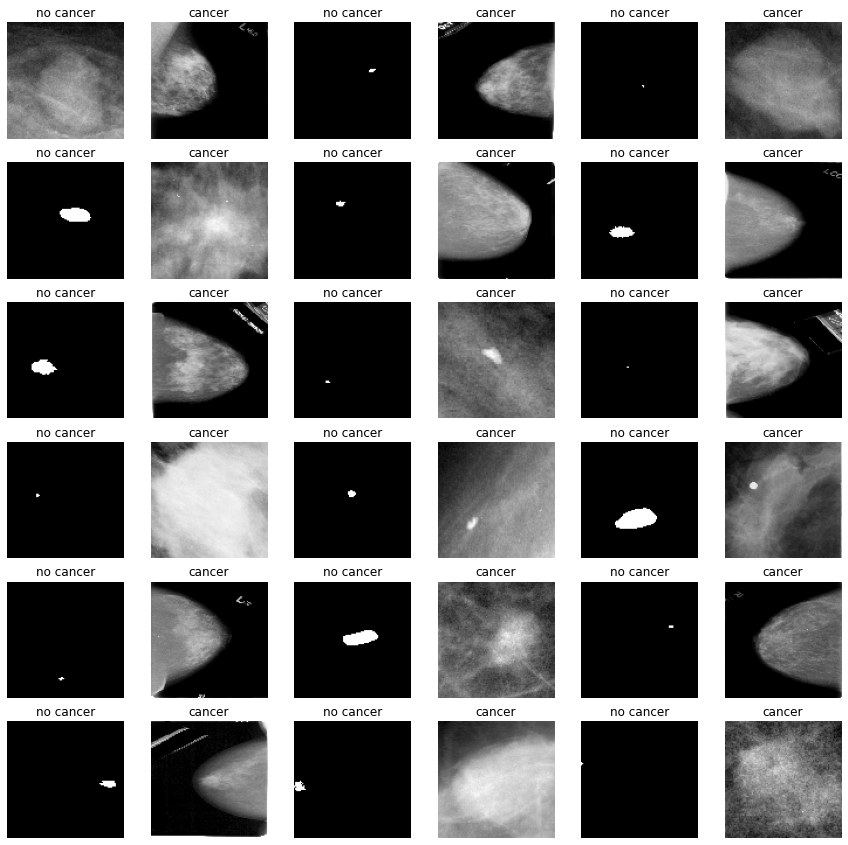

In [ ]:
from keras.preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:

        img = image.load_img((non_can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

s = 1
for num in some_can:

        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

In [ ]:
from matplotlib.image import imread
import cv2

some_non_img = random.sample(non_can_img, len(non_can_img))
some_can_img = random.sample(can_img, len(can_img))

non_img_arr = []
can_img_arr = []

for img in some_non_img:

    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (299, 299), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])

for img in some_can_img:

    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (299, 299), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [ ]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

print('X shape : {}' .format(X.shape))

In [ ]:
np.save('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/299_image_X',X)
np.save('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/299_image_y',y)

In [ ]:
import numpy as np
X=np.load('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/299_image_X.npy')
y=np.load('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/299_image_y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42,stratify=y)

rate = 0.5
num = int(X.shape[0] * rate)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (7677, 299, 299, 3)
X_test shape : (2560, 299, 299, 3)
y_train shape : (7677, 2)
y_test shape : (2560, 2)


In [ ]:
del X,y

# Convolution Neural Network

In [ ]:
import tensorflow as tf
tf.random.set_seed(100)

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (299, 299,3)),
tf.keras.layers.MaxPooling2D(strides = 2),
tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
#tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation = 'relu'),
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(2, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 128)       1

In [ ]:
callback=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/model_299.h5',save_best_only=True,verbose=1,monitor='val_accuracy')

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30 , batch_size = 128,callbacks=[callback])

Epoch 1/30
60/60 [==============================] - ETA: 0s - loss: 11.7507 - accuracy: 0.8235
Epoch 1: val_accuracy improved from -inf to 0.83750, saving model to /content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/model1_299.h5
60/60 [==============================] - 56s 671ms/step - loss: 11.7507 - accuracy: 0.8235 - val_loss: 0.3512 - val_accuracy: 0.8375
Epoch 2/30
60/60 [==============================] - ETA: 0s - loss: 0.3029 - accuracy: 0.8458
Epoch 2: val_accuracy improved from 0.83750 to 0.84961, saving model to /content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/model1_299.h5
60/60 [==============================] - 37s 610ms/step - loss: 0.3029 - accuracy: 0.8458 - val_loss: 0.3114 - val_accuracy: 0.8496
Epoch 3/30
60/60 [==============================] - ETA: 0s - loss: 0.2686 - accuracy: 0.8589
Epoch 3: val_accuracy did not improve from 0.84961
60/60 [==============================] - 32s 534ms/step - loss: 0.2686 - accuracy: 0.8589 - val_loss: 0.3121 - val_accuracy: 0.8

In [ ]:
model.evaluate(X_test,y_test)

80/80 [==============================] - 5s 47ms/step - loss: 0.5979 - accuracy: 0.8559


[0.5978623628616333, 0.8558593988418579]

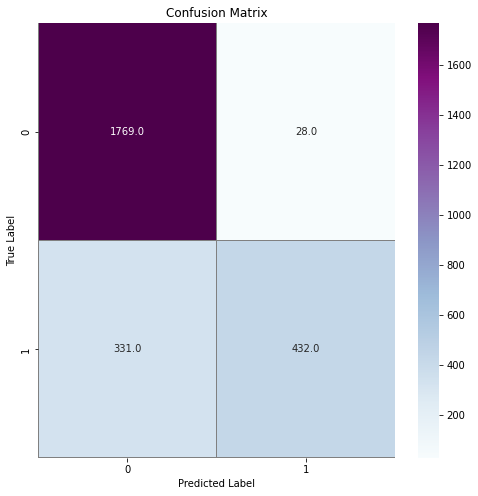

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

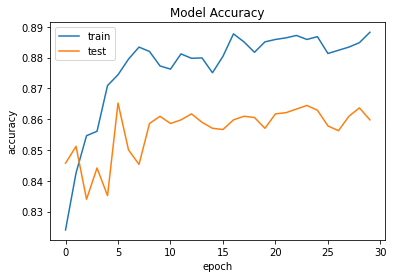

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

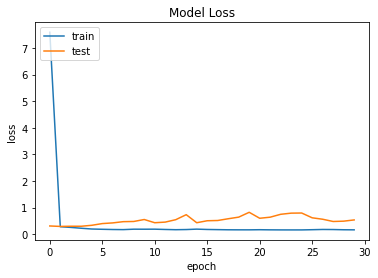

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(X_test)
prediction

array([[8.1317458e-15, 1.0000000e+00],
       [1.0000000e+00, 1.6725737e-20],
       [1.0000000e+00, 3.4536891e-26],
       ...,
       [4.2038005e-12, 1.0000000e+00],
       [1.0000000e+00, 3.1399336e-18],
       [1.0000000e+00, 1.3296351e-15]], dtype=float32)

In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])


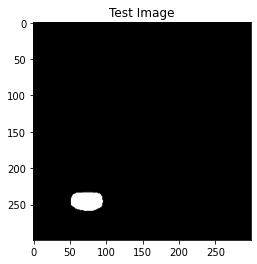

In [ ]:
index = 90
img_plot(X_test, index)

In [ ]:
input = X_test[index:index+1]

In [ ]:
pred = model.predict(input)[0].argmax()
label = y_test[index].argmax()

In [ ]:
print('Predicted Value using  cnn model',pred)
print("True Value",label)

Predicted Value using  cnn model 0
True Value 0


# Transfer learning


## Inception V3

In [ ]:
import tensorflow as tf

image_model = tf.keras.applications.InceptionV3(include_top=True,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-2].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)
image_features_extract_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
import numpy as np
X=np.load('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/299_image_X.npy')
y=np.load('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/299_image_y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42,stratify=y)

rate = 0.5
num = int(X.shape[0] * rate)
y_train = to_categorical(y_train,2)
y_test = to_categorical(y_test, 2)

print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (1783, 299, 299, 3)
X_test shape : (595, 299, 299, 3)
y_train shape : (1783, 4)
y_test shape : (595, 4)


In [ ]:
image_embed=image_features_extract_model.predict(X_train)
image_embed.shape

(1783, 2048)

In [ ]:
image_embed_test=image_features_extract_model.predict(X_test)
image_embed_test.shape

(595, 2048)

In [ ]:
np.save('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/vector_xtrain',image_embed)
np.save('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/vector_xtest',image_embed_test)

In [ ]:
inc_Xtrain=np.load('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/vector_xtrain.npy')
inc_Xtest=np.load('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/vector_xtest.npy')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(2048,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                131136    
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dense_20 (Dense)            (None, 2)                 258       
                                                                 
Total params: 139,714
Trainable params: 139,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
callback=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/model_v3.h5',save_best_only=True,verbose=1,monitor='val_accuracy')

In [ ]:
history = model.fit(inc_Xtrain, y_train, validation_data = (inc_Xtest, y_test), epochs =100 , batch_size = 128,callbacks=[callback])

Epoch 1/100
57/60 [===========================>..] - ETA: 0s - loss: 0.8458 - accuracy: 0.6802
Epoch 1: val_accuracy improved from -inf to 0.70312, saving model to /content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/model_v3.h5
60/60 [==============================] - 1s 12ms/step - loss: 0.8351 - accuracy: 0.6801 - val_loss: 0.6180 - val_accuracy: 0.7031
Epoch 2/100
45/60 [=====================>........] - ETA: 0s - loss: 0.6182 - accuracy: 0.7031
Epoch 2: val_accuracy did not improve from 0.70312
60/60 [==============================] - 0s 4ms/step - loss: 0.6202 - accuracy: 0.7021 - val_loss: 0.6144 - val_accuracy: 0.7031
Epoch 3/100
47/60 [======================>.......] - ETA: 0s - loss: 0.6132 - accuracy: 0.7021
Epoch 3: val_accuracy did not improve from 0.70312
60/60 [==============================] - 0s 5ms/step - loss: 0.6128 - accuracy: 0.7031 - val_loss: 0.6158 - val_accuracy: 0.7031
Epoch 4/100
57/60 [===========================>..] - ETA: 0s - loss: 0.6122 - accuracy: 0.70

In [ ]:
model.evaluate(inc_Xtest, y_test)[1]

80/80 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.7035


0.7035156488418579

# Final Model

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [ ]:
cnn_model1=load_model('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/model_299.h5')
cnn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 128)       1

In [ ]:
inc_Xtrain=np.load('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/vector_xtrain.npy')
inc_Xtest=np.load('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/vector_xtest.npy')

In [ ]:
inc_Xtrain.shape,inc_Xtest.shape

((7677, 2048), (2560, 2048))

In [ ]:
cnn_extractor1=Model(inputs=cnn_model1.input,outputs=cnn_model1.get_layer('dense').output)
cnn_extractor1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 299, 299, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856 

In [ ]:
X1_img=np.load('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/299_image_X.npy')
y1_img=np.load('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/299_image_y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_img, y1_img, test_size = 0.25, random_state = 42,stratify=y1_img)

rate = 0.5
num = int(X1_img.shape[0] * rate)

y_train1 = to_categorical(y_train1, 2)
y_test1 = to_categorical(y_test1, 2)


print('X_train shape : {}' .format(X_train1.shape))
print('X_test shape : {}' .format(X_test1.shape))
print('y_train shape : {}' .format(y_train1.shape))
print('y_test shape : {}' .format(y_test1.shape))

X_train shape : (7677, 299, 299, 3)
X_test shape : (2560, 299, 299, 3)
y_train shape : (7677, 2)
y_test shape : (2560, 2)


In [ ]:
del X1_img, y1_img

In [ ]:
image_embed_train1=cnn_extractor1.predict(X_train1)
image_embed_train1.shape

(7677, 128)

In [ ]:
image_embed_test1=cnn_extractor1.predict(X_test1)
image_embed_test1.shape

(2560, 128)

In [ ]:
final_Xtrain1=np.hstack((inc_Xtrain,image_embed_train1))

In [ ]:
final_Xtest1=np.hstack((inc_Xtest,image_embed_test1))

In [ ]:
y_train1=y_train1[:,0]

In [ ]:
y_test1=y_test1[:,0]

# Machine learning Classifier

In [ ]:
import xgboost
from xgboost import XGBClassifier
model1 = XGBClassifier()
# fit the model on the whole dataset
model1.fit(final_Xtrain1,y_train1)

XGBClassifier()

In [ ]:
y_pred1 = model1.predict(final_Xtest1)
y_pred1

array([1., 0., 0., ..., 1., 0., 1.], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred1)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test1, y_pred1))
cm

Accuracy :  0.882421875


array([[ 546,  213],
       [  88, 1713]])

# final model classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

         0.0       0.86      0.72      0.78       759
         1.0       0.89      0.95      0.92      1801

    accuracy                           0.88      2560
   macro avg       0.88      0.84      0.85      2560
weighted avg       0.88      0.88      0.88      2560



In [ ]:
cnn_mod=load_model('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/model_299.h5')
cnn_mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 128)       1

In [ ]:
y_pred = cnn_mod.predict(X_test)

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
y_pred

array([[9.9029082e-01, 9.7092288e-03],
       [4.4902444e-01, 5.5097556e-01],
       [0.0000000e+00, 1.0000000e+00],
       ...,
       [9.9977630e-01, 2.2374764e-04],
       [3.7973765e-01, 6.2026238e-01],
       [9.9981469e-01, 1.8536851e-04]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(y_pred,axis = 1)

In [ ]:
y_test.shape,y_pred.shape,y_pred_classes.shape

((2560, 2), (2560, 2), (2560,))

In [ ]:
y_pred_classes

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
y_test2=np.argmax(y_test,axis = 1)

In [ ]:
y_test2

array([0, 0, 1, ..., 0, 0, 0])

# CNN Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred_classes))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1801
           1       0.76      0.78      0.77       759

    accuracy                           0.86      2560
   macro avg       0.83      0.84      0.83      2560
weighted avg       0.86      0.86      0.86      2560



In [ ]:
mod=load_model('/content/drive/MyDrive/CBIS-DDSM Breast Cancer/temp/model_v3.h5')
mod.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                131136    
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dense_20 (Dense)            (None, 2)                 258       
                                                                 
Total params: 139,714
Trainable params: 139,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = mod.predict(inc_Xtest)

In [ ]:
y_pred_classes = np.argmax(y_pred,axis = 1)

In [ ]:
y_test2=np.argmax(y_test,axis = 1)

# inception classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred_classes))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83      1801
           1       0.50      0.00      0.00       759

    accuracy                           0.70      2560
   macro avg       0.60      0.50      0.41      2560
weighted avg       0.64      0.70      0.58      2560



# Results

In [ ]:
#Results
#CNN :- 86.016%
#InceptionV3 :- 70.35%
#Final Results :- 88.24%